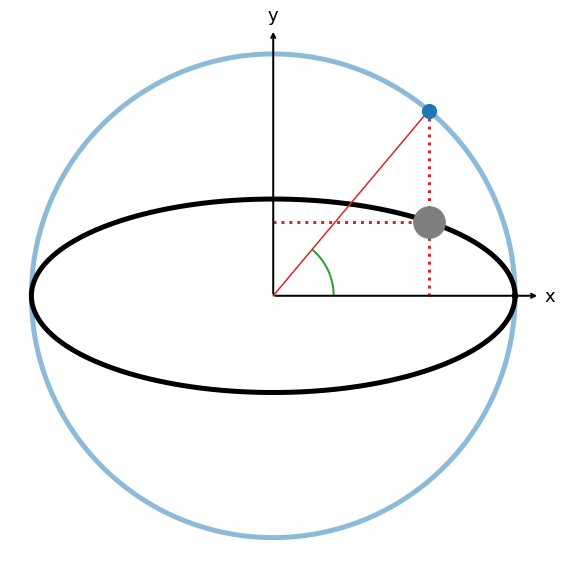

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc

# パラメータ
a = 1.0          # 円と楕円の長半径
b = 0.4          # 楕円の短半径 (b < a を仮定)
theta_deg = 50   # true anomaly θ [deg]
theta = np.deg2rad(theta_deg)

# 円と楕円の軌跡
t = np.linspace(0, 2*np.pi, 400)
xc = a * np.cos(t)
yc = a * np.sin(t)        # 真の軌道（円）
xe = a * np.cos(t)
ye = b * np.sin(t)        # 投影楕円

# θ に対応する点
xc_th = a * np.cos(theta)
yc_th = a * np.sin(theta)     # 円上の点
xe_th = a * np.cos(theta)
ye_th = b * np.sin(theta)     # 楕円上の点 P

fig, ax = plt.subplots(figsize=(8, 8))

# 円と楕円
ax.plot(xc, yc, color="tab:blue", alpha=0.5,  linewidth=5)   # 元の円軌道 (灰色)
ax.plot(xe, ye, color="k", linewidth=5)     # 投影楕円 (黒)

# 原点から円上の点への半径ベクトル
ax.plot([0, xc_th], [0, yc_th], color="tab:red")

# 円上の点と楕円上の点
ax.scatter([xc_th], [yc_th], color="tab:blue", zorder=3, s=200)
ax.scatter([xe_th], [ye_th], color="tab:gray", zorder=3, s=1000)

# 垂直線 (x = a cos θ) と水平線 (y の高さの違い) を補助線として描く
ax.plot([xc_th, xc_th], [0, yc_th], color="tab:red", linestyle=":", linewidth=3)
#ax.plot([0, xc_th], [yc_th, yc_th], color="tab:red", linestyle=":", linewidth=3)
ax.plot([0, xe_th], [ye_th, ye_th], color="tab:red", linestyle=":", linewidth=3)

# θ の小さな弧を原点まわりに描く
arc = Arc((0, 0), 0.5, 0.5, angle=0,
          theta1=0, theta2=theta_deg,
          color="tab:green", linewidth=2)
ax.add_patch(arc)

# 表示範囲とアスペクト比
ax.set_aspect("equal", "box")
ax.set_xlim(-a * 1.1, a * 1.1)
ax.set_ylim(-a * 1.1, a * 1.1)

# もとの枠線と目盛りを消す
for spine in ax.spines.values():
    spine.set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

# x 軸と y 軸の矢印を原点から描く
arrow_len = 1.1 * a
ax.annotate("", xy=(arrow_len, 0), xytext=(0, 0),
            arrowprops=dict(arrowstyle="->", linewidth=2))
ax.annotate("", xy=(0, arrow_len), xytext=(0, 0),
            arrowprops=dict(arrowstyle="->", linewidth=2))

# 軸ラベル
ax.text(arrow_len * 1.02, 0, "x", fontsize=18, va="center", ha="left")
ax.text(0, arrow_len * 1.02, "y", fontsize=18, va="bottom", ha="center")

plt.tight_layout()

# 透過 PNG で保存
plt.savefig("orbit_projection.png", dpi=300, transparent=True,
            bbox_inches="tight", pad_inches=0.05)

plt.show()
